In [1]:
# Importing modules
import pandas as pd
import os

# Read data into papers
papers = pd.read_csv('Dataset-Group-57.csv')
# remove empty tweet translated
papers.dropna(axis=0,
    subset=["Tweet Translated"],
    inplace=True)
papers.shape
#make results folder if not exists
os.makedirs("results",exist_ok=True)

(170, 50)

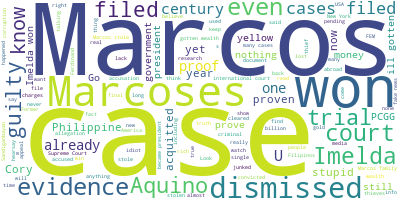

In [2]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['Tweet Translated'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [3]:
import gensim
from gensim.utils import simple_preprocess
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#This next line removes the search terms from topic clustering. Comment this out to include the search terms.
stop_words = stop_words + ["even","yet","still","marcos","imelda","ferdinand","marcoses","all","every","none","case","cases","filed","trial","charges","charge","win","won","lose","lost","dismiss","dismissed","junk","junked","acquit","acquitted","not","guilty"]

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers["Tweet Translated"].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['family', 'pcgg', 'government', 'takes', 'wealth']


In [4]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [14]:
def cre(runnum):
    from pprint import pprint
    # number of topics
    num_topics = 5
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.61,
                                           eta=0.9099999999999999
                                          )
    # Print the Keyword in the 10 topics
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]

    import pyLDAvis.gensim
    import pickle 
    import pyLDAvis
    # Visualize the topics
    pyLDAvis.enable_notebook()
    print(os.getcwd())
    LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
    # # this is a bit time consuming - make the if statement True
    # # if you want to execute visualization prep yourself
    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)
    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'final-final'+str(runnum)+'.html')
    LDAvis_prepared
    print('./results/ldavis_prepared_'+ str(num_topics) +'final-final'+ str(runnum)+'.html')

for i in range(50): 
    cre(i)

[(0,
  '0.010*"us" + 0.010*"century" + 0.008*"evidence" + 0.008*"know" + '
  '0.008*"one" + 0.007*"many" + 0.007*"court" + 0.006*"wealth" + '
  '0.005*"government" + 0.005*"philippines"'),
 (1,
  '0.005*"true" + 0.004*"said" + 0.004*"pcgg" + 0.003*"believe" + 0.003*"also" '
  '+ 0.003*"like" + 0.003*"evidences" + 0.003*"stole" + 0.003*"know" + '
  '0.003*"abroad"'),
 (2,
  '0.008*"evidence" + 0.007*"york" + 0.007*"new" + 0.006*"proof" + '
  '0.005*"court" + 0.005*"prove" + 0.005*"show" + 0.004*"single" + '
  '0.004*"really" + 0.004*"since"'),
 (3,
  '0.019*"court" + 0.007*"already" + 0.007*"wealth" + 0.007*"supreme" + '
  '0.006*"philippines" + 0.006*"years" + 0.005*"know" + 0.005*"evidence" + '
  '0.005*"sandiganbayan" + 0.004*"thief"'),
 (4,
  '0.009*"stupid" + 0.007*"aquino" + 0.007*"proof" + 0.006*"proven" + '
  '0.006*"stole" + 0.006*"nothing" + 0.006*"years" + 0.005*"money" + '
  '0.005*"thieves" + 0.004*"people"')]
C:\Users\Joshua\Documents\Jupyter Notebooks\LDA
./results/ldavis

./results/ldavis_prepared_5final-final7.html
[(0,
  '0.010*"us" + 0.010*"century" + 0.008*"evidence" + 0.008*"know" + '
  '0.008*"one" + 0.007*"many" + 0.007*"court" + 0.006*"wealth" + '
  '0.005*"philippines" + 0.005*"government"'),
 (1,
  '0.005*"true" + 0.004*"said" + 0.004*"pcgg" + 0.003*"believe" + 0.003*"also" '
  '+ 0.003*"like" + 0.003*"evidences" + 0.003*"stole" + 0.003*"know" + '
  '0.003*"abroad"'),
 (2,
  '0.007*"evidence" + 0.007*"york" + 0.007*"new" + 0.006*"proof" + '
  '0.005*"court" + 0.005*"prove" + 0.005*"show" + 0.004*"single" + '
  '0.004*"really" + 0.004*"since"'),
 (3,
  '0.019*"court" + 0.007*"already" + 0.007*"wealth" + 0.007*"supreme" + '
  '0.006*"philippines" + 0.006*"years" + 0.005*"know" + 0.005*"evidence" + '
  '0.005*"sandiganbayan" + 0.004*"thief"'),
 (4,
  '0.009*"stupid" + 0.007*"aquino" + 0.006*"proof" + 0.006*"stole" + '
  '0.006*"proven" + 0.006*"nothing" + 0.005*"years" + 0.005*"money" + '
  '0.005*"thieves" + 0.004*"people"')]
C:\Users\Joshua\Doc

./results/ldavis_prepared_5final-final15.html
[(0,
  '0.010*"us" + 0.010*"century" + 0.008*"evidence" + 0.008*"know" + '
  '0.008*"one" + 0.007*"many" + 0.007*"court" + 0.006*"wealth" + '
  '0.005*"government" + 0.005*"philippines"'),
 (1,
  '0.005*"true" + 0.004*"said" + 0.004*"pcgg" + 0.003*"believe" + 0.003*"also" '
  '+ 0.003*"like" + 0.003*"evidences" + 0.003*"stole" + 0.003*"know" + '
  '0.003*"abroad"'),
 (2,
  '0.008*"evidence" + 0.007*"york" + 0.007*"new" + 0.005*"proof" + '
  '0.005*"court" + 0.005*"prove" + 0.005*"show" + 0.004*"single" + '
  '0.004*"really" + 0.004*"since"'),
 (3,
  '0.019*"court" + 0.007*"already" + 0.007*"wealth" + 0.007*"supreme" + '
  '0.006*"philippines" + 0.006*"years" + 0.005*"know" + 0.005*"evidence" + '
  '0.005*"sandiganbayan" + 0.004*"thief"'),
 (4,
  '0.009*"stupid" + 0.007*"aquino" + 0.007*"proof" + 0.006*"proven" + '
  '0.006*"stole" + 0.006*"nothing" + 0.006*"years" + 0.005*"money" + '
  '0.005*"thieves" + 0.004*"people"')]
C:\Users\Joshua\Do

./results/ldavis_prepared_5final-final23.html
[(0,
  '0.010*"us" + 0.010*"century" + 0.008*"evidence" + 0.008*"know" + '
  '0.008*"one" + 0.007*"many" + 0.007*"court" + 0.006*"wealth" + '
  '0.005*"philippines" + 0.005*"government"'),
 (1,
  '0.005*"true" + 0.004*"said" + 0.004*"pcgg" + 0.003*"believe" + 0.003*"also" '
  '+ 0.003*"like" + 0.003*"evidences" + 0.003*"stole" + 0.003*"know" + '
  '0.003*"abroad"'),
 (2,
  '0.007*"evidence" + 0.007*"york" + 0.007*"new" + 0.006*"proof" + '
  '0.005*"court" + 0.005*"prove" + 0.005*"show" + 0.004*"single" + '
  '0.004*"really" + 0.004*"since"'),
 (3,
  '0.019*"court" + 0.007*"already" + 0.007*"wealth" + 0.007*"supreme" + '
  '0.006*"philippines" + 0.006*"years" + 0.005*"know" + 0.005*"evidence" + '
  '0.005*"sandiganbayan" + 0.004*"thief"'),
 (4,
  '0.009*"stupid" + 0.007*"aquino" + 0.006*"proof" + 0.006*"stole" + '
  '0.006*"proven" + 0.006*"nothing" + 0.005*"years" + 0.005*"money" + '
  '0.005*"thieves" + 0.004*"people"')]
C:\Users\Joshua\Do

./results/ldavis_prepared_5final-final31.html
[(0,
  '0.010*"century" + 0.010*"us" + 0.009*"evidence" + 0.008*"one" + '
  '0.008*"many" + 0.008*"know" + 0.007*"court" + 0.006*"wealth" + '
  '0.006*"philippines" + 0.005*"government"'),
 (1,
  '0.005*"true" + 0.004*"said" + 0.004*"pcgg" + 0.004*"believe" + 0.003*"also" '
  '+ 0.003*"like" + 0.003*"evidences" + 0.003*"know" + 0.003*"family" + '
  '0.003*"stole"'),
 (2,
  '0.007*"evidence" + 0.007*"york" + 0.007*"new" + 0.006*"proof" + '
  '0.005*"court" + 0.005*"prove" + 0.004*"show" + 0.004*"single" + '
  '0.004*"thief" + 0.004*"really"'),
 (3,
  '0.018*"court" + 0.007*"already" + 0.006*"years" + 0.006*"wealth" + '
  '0.006*"philippines" + 0.006*"supreme" + 0.006*"know" + 0.005*"evidence" + '
  '0.005*"sandiganbayan" + 0.004*"criminal"'),
 (4,
  '0.009*"stupid" + 0.007*"aquino" + 0.006*"stole" + 0.006*"proof" + '
  '0.005*"nothing" + 0.005*"money" + 0.005*"proven" + 0.005*"years" + '
  '0.004*"anything" + 0.004*"people"')]
C:\Users\Joshu

./results/ldavis_prepared_5final-final39.html
[(0,
  '0.010*"us" + 0.010*"century" + 0.008*"evidence" + 0.008*"know" + '
  '0.008*"one" + 0.007*"many" + 0.007*"court" + 0.006*"wealth" + '
  '0.005*"government" + 0.005*"philippines"'),
 (1,
  '0.005*"true" + 0.004*"said" + 0.004*"pcgg" + 0.003*"believe" + 0.003*"also" '
  '+ 0.003*"like" + 0.003*"evidences" + 0.003*"stole" + 0.003*"know" + '
  '0.003*"abroad"'),
 (2,
  '0.008*"evidence" + 0.007*"york" + 0.007*"new" + 0.005*"proof" + '
  '0.005*"court" + 0.005*"prove" + 0.005*"show" + 0.004*"single" + '
  '0.004*"really" + 0.004*"since"'),
 (3,
  '0.019*"court" + 0.007*"already" + 0.007*"wealth" + 0.007*"supreme" + '
  '0.006*"philippines" + 0.006*"years" + 0.005*"know" + 0.005*"evidence" + '
  '0.005*"sandiganbayan" + 0.004*"thief"'),
 (4,
  '0.009*"stupid" + 0.007*"aquino" + 0.007*"proof" + 0.006*"proven" + '
  '0.006*"stole" + 0.006*"nothing" + 0.006*"years" + 0.005*"money" + '
  '0.005*"thieves" + 0.004*"people"')]
C:\Users\Joshua\Do

./results/ldavis_prepared_5final-final47.html
[(0,
  '0.010*"us" + 0.010*"century" + 0.008*"evidence" + 0.008*"know" + '
  '0.008*"one" + 0.007*"many" + 0.007*"court" + 0.006*"wealth" + '
  '0.005*"government" + 0.005*"philippines"'),
 (1,
  '0.005*"true" + 0.004*"said" + 0.004*"pcgg" + 0.003*"believe" + 0.003*"also" '
  '+ 0.003*"like" + 0.003*"evidences" + 0.003*"stole" + 0.003*"know" + '
  '0.003*"abroad"'),
 (2,
  '0.008*"evidence" + 0.007*"york" + 0.007*"new" + 0.006*"proof" + '
  '0.005*"court" + 0.005*"prove" + 0.005*"show" + 0.004*"single" + '
  '0.004*"really" + 0.004*"since"'),
 (3,
  '0.019*"court" + 0.007*"already" + 0.007*"wealth" + 0.007*"supreme" + '
  '0.006*"philippines" + 0.006*"years" + 0.005*"know" + 0.005*"evidence" + '
  '0.005*"sandiganbayan" + 0.004*"thief"'),
 (4,
  '0.009*"stupid" + 0.007*"aquino" + 0.007*"proof" + 0.006*"proven" + '
  '0.006*"stole" + 0.006*"nothing" + 0.006*"years" + 0.005*"money" + '
  '0.005*"thieves" + 0.004*"people"')]
C:\Users\Joshua\Do

In [8]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
print(os.getcwd())
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'final-final.html')
LDAvis_prepared
print('./results/ldavis_prepared_'+ str(num_topics) +'final-final.html')

C:\Users\Joshua\Documents\Jupyter Notebooks\LDA
./results/ldavis_prepared_5final-final.html


In [21]:
ttranslated = list(papers["Tweet Translated"])
def getmaxscoretweet(ttr, lwords):
    maxtweet = None
    maxscore = 0
    for i in ttr:
        curscore = 0
        for word in lwords:
            if word in i.lower():
                curscore += 1
        if curscore > maxscore:
            maxscore = curscore
            maxtweet = i
    return maxtweet

t1 = "us century evidence know one many court wealth government philippines".split()
t2 = "court already wealth supreme philippines year know evidence sandiganbayan thief".split()
t3 = "stupid aquino proof proven stole nothing years money thieves people".split()
t4 = "evidence york new proof court prove show single really since".split()
t5 = "true said pcgg believe also like evidences stole know abroad".split()

print("Topic 1:", getmaxscoretweet(ttranslated, t1))
print("Topic 2:", getmaxscoretweet(ttranslated, t2))
print("Topic 3:", getmaxscoretweet(ttranslated, t3))
print("Topic 4:", getmaxscoretweet(ttranslated, t4))
print("Topic 5:", getmaxscoretweet(ttranslated, t5))


Topic 1: Be careful Pang. Have you heard of Cyber Libel? You can't accuse anyone without evidence. Let the courts decide. All these Marcos wealth are unproven without evidence. New York courts acquitted the Marcoses. All allegations against them were fake news by CIA.
Topic 2: Been over 30 years now & it hasn't been proven there is ill-gotten wealth. Sandiganbayan & Supreme Court have junked all cases against Marcoses. Why were there no incarcerated Marcoses if the allegations were indeed true? dumb, stupid, jerk. you keep rambling about imagined stolen wealth 
Topic 3: What did the Marcoses steal? They the Cory Aquino government filed 935 cases against the Marcos not guilty to all of them .... 30 years has passed - not guilty nothing was proven... 
INSTEAD THE AQUINOS WERE THE ONES WHO STOLE FROM THE MARCOSES !! The Aquinos are the real thieves with evidence!
Topic 4: Be careful Pang. Have you heard of Cyber Libel? You can't accuse anyone without evidence. Let the courts decide. All t

0      900 cases against the Marcos family was filed ...
1      906 cases against all won by Marcos. How can y...
2      906 CASES ALL WON BY MARCOS. ALLEGATIONS AGAIN...
3      Isn't it funny how LP keeps on reminiscing mar...
4      Did you know that marcos family won all the ca...
                             ...                        
165    If you have proof of plunder, go and offer it,...
166    If there are any idiots here, it's you... For ...
167    You're stupid because you can't admit that all...
168    Are you amazed at the justice system? You just...
169    Eh There really wasn't anything stolen, they w...
Name: Tweet Translated, Length: 170, dtype: object
